In [1]:
'''
Welcome to our Notebook!

This is for the Urban Air Quality Group

Group Members: Selma, Ethan, Sophiya
'''

'\nWelcome to our Notebook!\n\nThis is for the Urban Air Quality Group\n\nGroup Members: Selma, Ethan, Sophiya\n'

In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [ ]:
# Read the CSV file
df = pd.read_csv('IHME_GBD_2021_AIR_POLLUTION_1990_2021_PM_Y2022M01D31.csv')

df.head()

,measure_id,measure_name,location_id,location_name,rei_id,rei_name,year_id,mean,median,lower,upper,unit
0,19,Continuous,1,Global,86,Ambient particulate matter pollution,1990,39.535353,38.720921,29.652773,52.575465,micrograms per cubic meter
1,19,Continuous,1,Global,86,Ambient particulate matter pollution,1991,39.228650,38.693484,31.173213,49.421749,micrograms per cubic meter
2,19,Continuous,1,Global,86,Ambient particulate matter pollution,1992,38.978047,38.589155,32.093107,47.101727,micrograms per cubic meter
3,19,Continuous,1,Global,86,Ambient particulate matter pollution,1993,38.789629,38.381171,32.354574,46.929316,micrograms per cubic meter
4,19,Continuous,1,Global,86,Ambient particulate matter pollution,1994,38.667614,38.177500,31.756251,48.136018,micrograms per cubic meter


In [ ]:
print(df.columns)

Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'rei_id',
       'rei_name', 'year_id', 'mean', 'median', 'lower', 'upper', 'unit'],
      dtype='object')


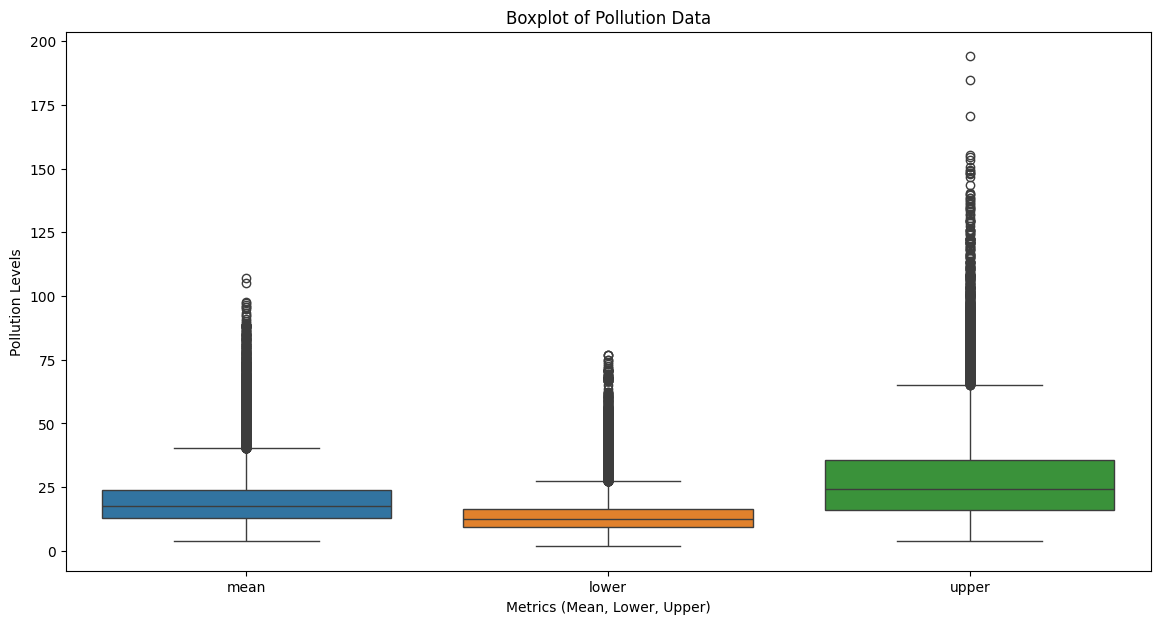

In [ ]:
# graph boxplot
# Create a boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['mean', 'lower', 'upper']])
plt.title('Boxplot of Pollution Data')
plt.ylabel('Pollution Levels')
plt.xlabel('Metrics (Mean, Lower, Upper)')
plt.show()


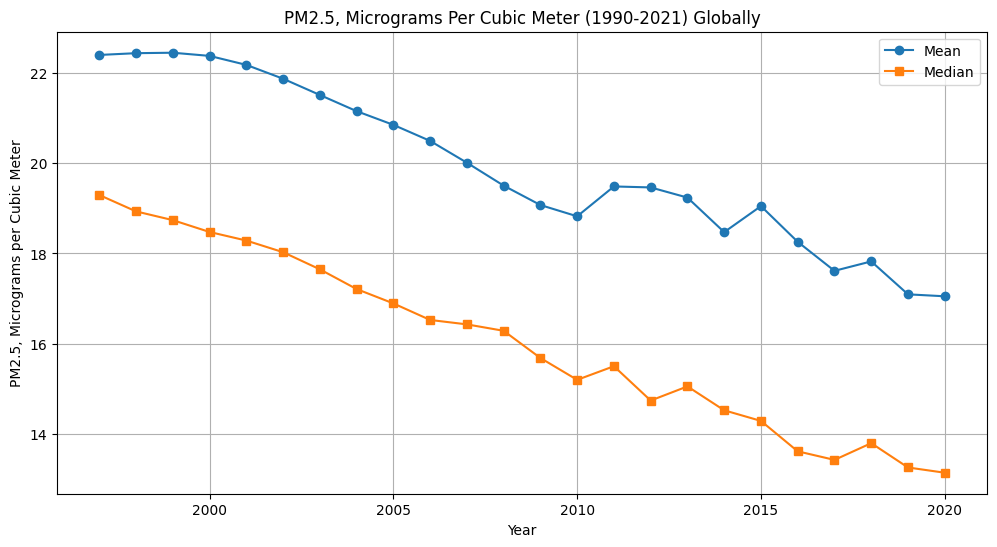

In [ ]:
# Filter the data to include only rows between 1990 and 2021
filtered_df = df[(df['year_id'] >= 1997) & (df['year_id'] <= 2021)]

# Group by 'Year' and calculate the mean and median for the 'Value' column
stats = filtered_df.groupby('year_id')['mean'].agg(['mean', 'median']).reset_index()

# Plot the mean and median
plt.figure(figsize=(12, 6))
plt.plot(stats['year_id'], stats['mean'], label='Mean', marker='o')
plt.plot(stats['year_id'], stats['median'], label='Median', marker='s')
plt.title('PM2.5, Micrograms Per Cubic Meter (1990-2021) Globally')
plt.xlabel('Year')
plt.ylabel('PM2.5, Micrograms per Cubic Meter')
plt.legend()
plt.grid(True)
plt.show()

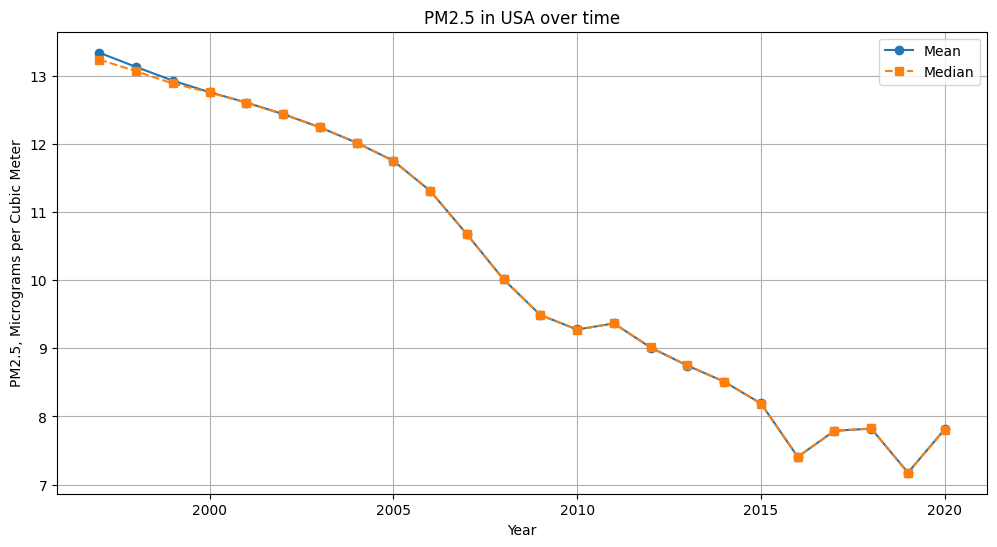

In [ ]:


# Filter the data for years 1990–2021 and location_name == 'United States of America'
filtered_df = df[(df['year_id'] >= 1997) & (df['year_id'] <= 2021) & (df['location_name'] == 'United States of America')]

# Group by 'year_id' and calculate mean and median
filtered_PM_data = filtered_df.groupby('year_id')[['mean', 'median']].mean().reset_index()

# Plot the mean and median
plt.figure(figsize=(12, 6))
plt.plot(filtered_PM_data['year_id'], filtered_PM_data['mean'], label='Mean', marker='o', linestyle='-')
plt.plot(filtered_PM_data['year_id'], filtered_PM_data['median'], label='Median', marker='s', linestyle='--')
plt.title('PM2.5 in USA over time')
plt.xlabel('Year')
plt.ylabel('PM2.5, Micrograms per Cubic Meter')
plt.legend()
plt.grid(True)
plt.show()

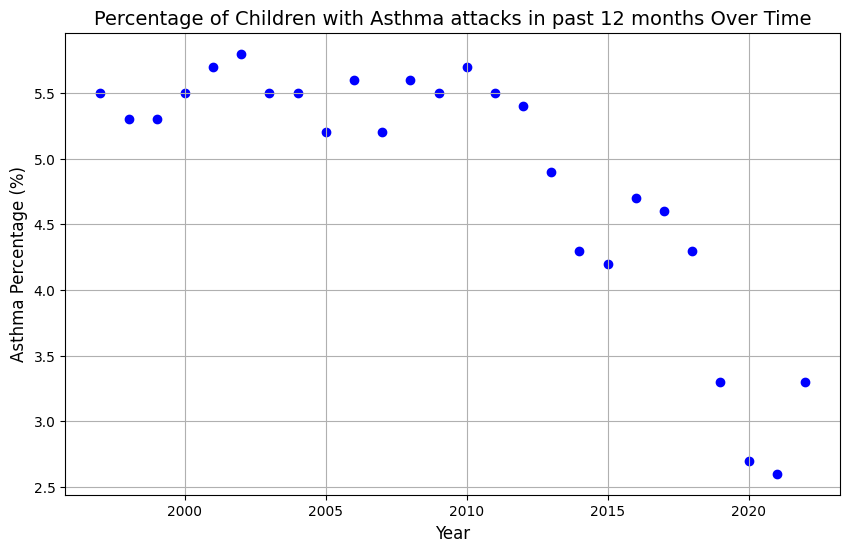

In [ ]:
# Load your dataset into a pandas DataFrame
data = pd.read_csv("asthma_in_children.csv")

# Filter the dataset for a specific group, such as "Total" or a specific age group (optional)
asthma_data_filtered = data[(data['STUB_LABEL'] == 'Younger than 18 years') & 
                     (data['PANEL'] == 'Asthma attack in past 12 months') &
                     (data['UNIT'] == "Percent of children, crude")]


# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(asthma_data_filtered['YEAR'], asthma_data_filtered['ESTIMATE'], color='blue', label='Asthma Percentage')

# Add titles and labels
plt.title('Percentage of Children with Asthma attacks in past 12 months Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Asthma Percentage (%)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

Index(['YEAR', 'mean', 'median'], dtype='object')
Mean Squared Error: 0.3168178432934824


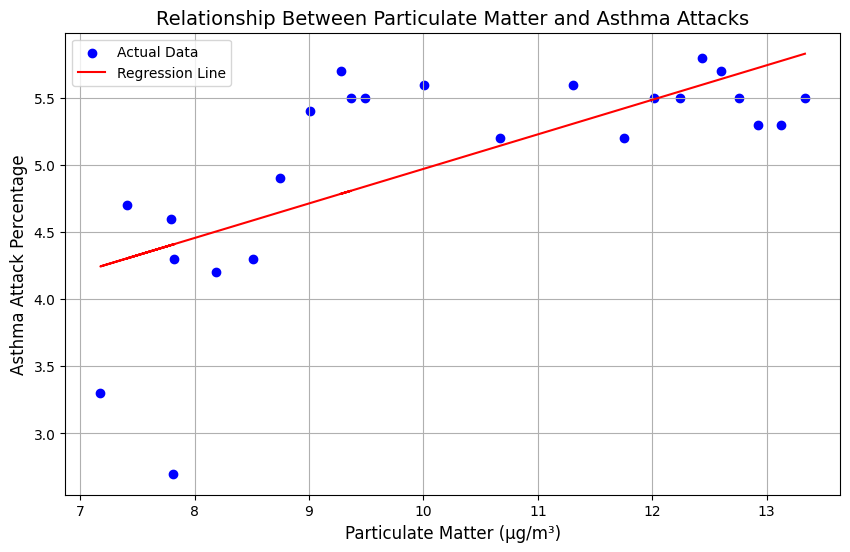

In [ ]:
filtered_PM_data = filtered_PM_data.rename(columns={'year_id': 'YEAR'})

print(filtered_PM_data.columns)
#print(asthma_data_filtered.columns)
# Merge both datasets on the 'year'
merged_data = pd.merge(asthma_data_filtered, filtered_PM_data, on='YEAR')

# Select features and target
X = merged_data[['mean']]  # Particulate levels
y = merged_data['ESTIMATE']  # Asthma attack percentage

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualize the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')

# Add titles and labels
plt.title('Relationship Between Particulate Matter and Asthma Attacks', fontsize=14)
plt.xlabel('Particulate Matter (µg/m³)', fontsize=12)
plt.ylabel('Asthma Attack Percentage', fontsize=12)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Mean Squared Error: 0.19148909668290445
R-squared: 0.6784698003458693


C:\Users\ethan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


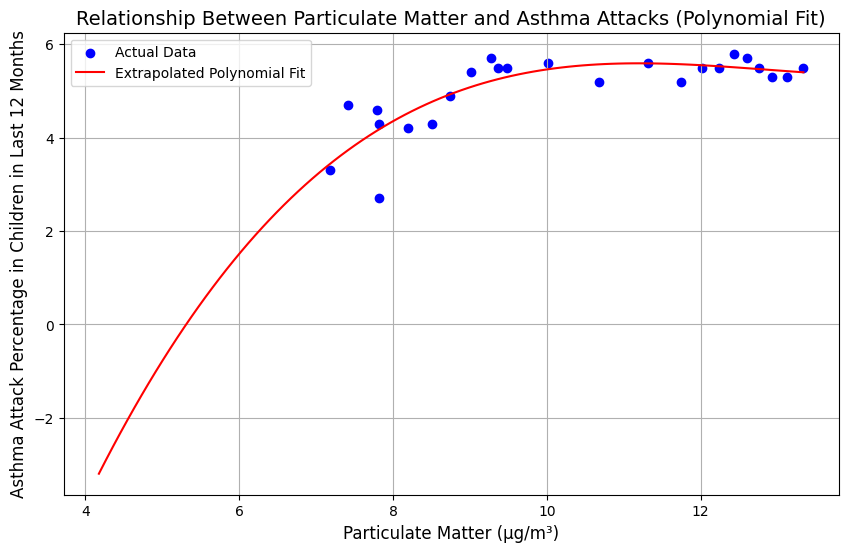

In [ ]:

# Select features and target
X = merged_data[['mean']]  # Particulate levels
y = merged_data['ESTIMATE']  # Asthma attack percentage

#print(merged_data.head)

# Transform features to include polynomial terms
poly = PolynomialFeatures(degree=3)  # Degree 3 for cubic polynomial fit
X_poly = poly.fit_transform(X)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions on the original data
y_pred = model.predict(X_poly)

# Generate extended x-axis values for prediction
X_extended = np.linspace(X.min() - 3, X.max(), 100).reshape(-1, 1)  # Extend below current minimum
X_extended_poly = poly.transform(X_extended)
y_extended_pred = model.predict(X_extended_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualize the data and the polynomial fit with extrapolated predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')  # Actual data points
plt.plot(X_extended, y_extended_pred, color='red', label='Extrapolated Polynomial Fit')  # Fit line

# Add titles and labels
plt.title('Relationship Between Particulate Matter and Asthma Attacks (Polynomial Fit)', fontsize=14)
plt.xlabel('Particulate Matter (µg/m³)', fontsize=12)
plt.ylabel('Asthma Attack Percentage in Children in Last 12 Months', fontsize=12)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


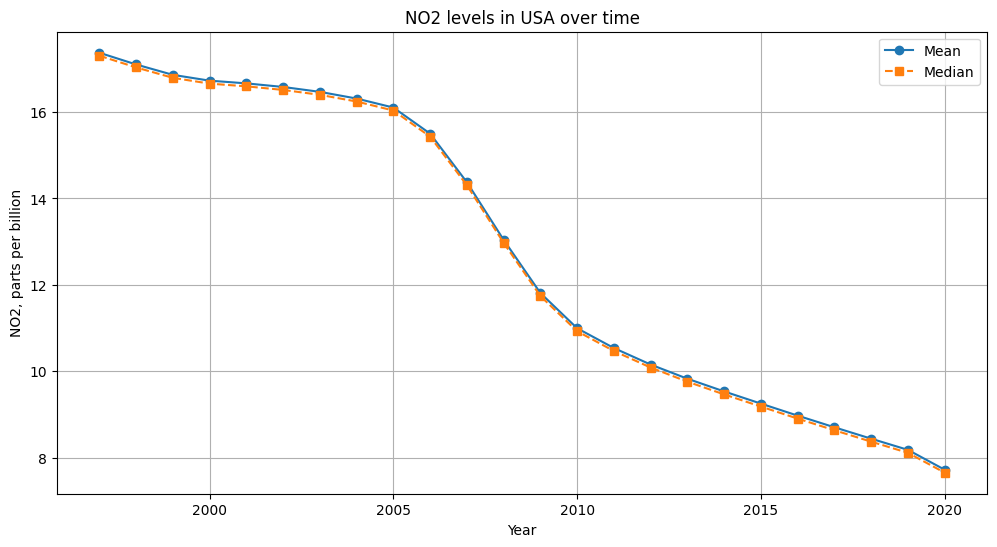

In [ ]:
# nitrogen dioxide dataset

# Read the CSV file
df = pd.read_csv('IHME_GBD_2021_AIR_POLLUTION_1990_2021_NO2_Y2022M01D31.csv')

# Filter the data for years 1990–2021 and location_name == 'United States of America'
filtered_df = df[(df['year_id'] >= 1997) & (df['year_id'] <= 2021) & (df['location_name'] == 'United States of America')]

# Group by 'year_id' and calculate mean and median
filtered_NO2_data = filtered_df.groupby('year_id')[['mean', 'median']].mean().reset_index()

# Plot the mean and median
plt.figure(figsize=(12, 6))
plt.plot(filtered_NO2_data['year_id'], filtered_NO2_data['mean'], label='Mean', marker='o', linestyle='-')
plt.plot(filtered_NO2_data['year_id'], filtered_NO2_data['median'], label='Median', marker='s', linestyle='--')
plt.title('NO2 levels in USA over time')
plt.xlabel('Year')
plt.ylabel('NO2, parts per billion')
plt.legend()
plt.grid(True)
plt.show()

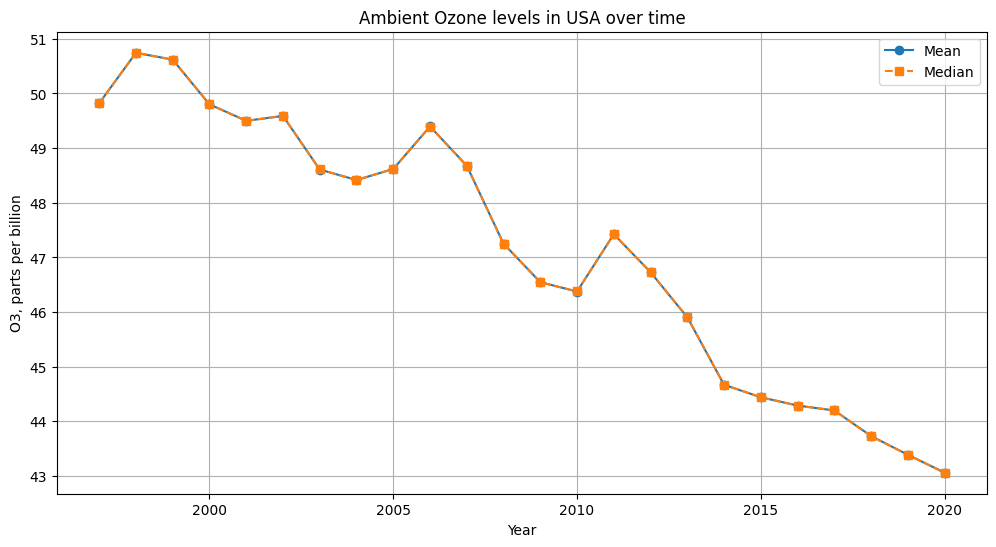

In [ ]:
# ozone dataset

# Read the CSV file
df = pd.read_csv('IHME_GBD_2021_AIR_POLLUTION_1990_2021_OZONE_Y2022M01D31.csv')

# Filter the data for years 1990–2021 and location_name == 'United States of America'
filtered_df = df[(df['year_id'] >= 1997) & (df['year_id'] <= 2021) & (df['location_name'] == 'United States of America')]

# Group by 'year_id' and calculate mean and median
filtered_ozone_data = filtered_df.groupby('year_id')[['mean', 'median']].mean().reset_index()

# Plot the mean and median
plt.figure(figsize=(12, 6))
plt.plot(filtered_ozone_data['year_id'], filtered_ozone_data['mean'], label='Mean', marker='o', linestyle='-')
plt.plot(filtered_ozone_data['year_id'], filtered_ozone_data['median'], label='Median', marker='s', linestyle='--')
plt.title('Ambient Ozone levels in USA over time')
plt.xlabel('Year')
plt.ylabel('O3, parts per billion')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# merge data
filtered_NO2_data = filtered_NO2_data.rename(columns={'year_id': 'YEAR'})
filtered_ozone_data = filtered_ozone_data.rename(columns={'year_id' : 'YEAR'})


combined = merged_data.merge(filtered_NO2_data, on=["YEAR"])
combined = combined.merge(filtered_ozone_data, on=["YEAR"])

<bound method NDFrame.head of     HUS_YEAR  PANEL_NUM                            PANEL  \
0       2022          2  Asthma attack in past 12 months   
1       2022          2  Asthma attack in past 12 months   
2       2022          2  Asthma attack in past 12 months   
3       2022          2  Asthma attack in past 12 months   
4       2022          2  Asthma attack in past 12 months   
5       2022          2  Asthma attack in past 12 months   
6       2022          2  Asthma attack in past 12 months   
7       2022          2  Asthma attack in past 12 months   
8       2022          2  Asthma attack in past 12 months   
9       2022          2  Asthma attack in past 12 months   
10      2022          2  Asthma attack in past 12 months   
11      2022          2  Asthma attack in past 12 months   
12      2022          2  Asthma attack in past 12 months   
13      2022          2  Asthma attack in past 12 months   
14      2022          2  Asthma attack in past 12 months   
15      20

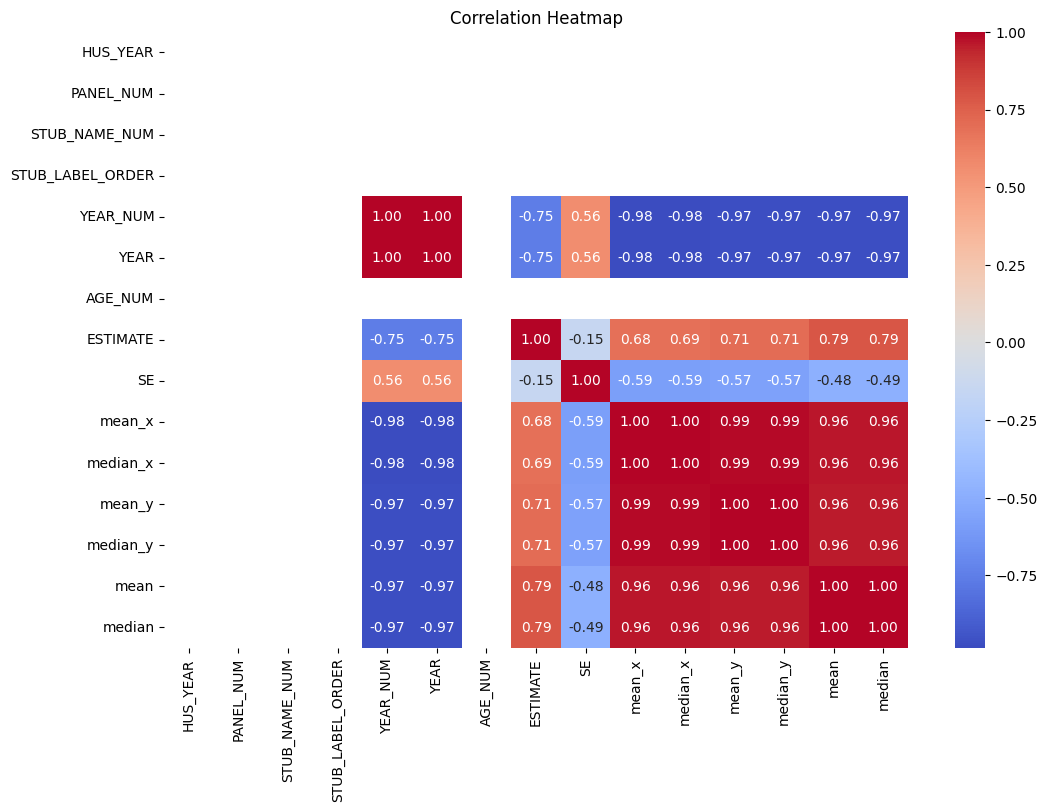

In [ ]:
# Correlation heatmap
print(combined.head)

# Ensure combined contains only numeric columns
numeric_combined = combined.select_dtypes(include='number')

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust width and height as needed


# Correlation heatmap
sns.heatmap(numeric_combined.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()